In [623]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [624]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [625]:
input = np.array([[0,0],[0,1],[1,0],[1,1]])
predicted_output = np.array([[0],[1],[1],[0]])
epochs = 200
lr = 0.1

In [626]:
inputLayerNeurons , hiddenLayerNeurons,outputLayerNeurons = 2,2,1
hardlim = np.vectorize(lambda x: 1 if x >= 0.5 else 0) 
np.random.seed(100000)

In [627]:
weights_input_hidden = np.random.uniform(-1, 1, (n_input, n_hidden))
weights_hidden_output = np.random.uniform(-1, 1, (n_hidden, n_output))
bias_hidden = np.random.uniform(-1, 1, (1, n_hidden))
bias_output = np.random.uniform(-1, 1, (1, n_output))

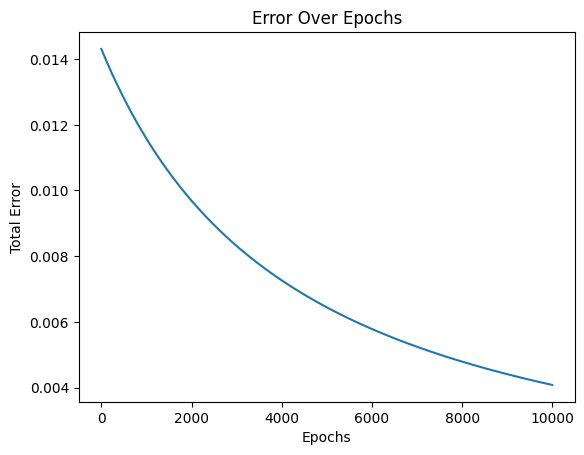

Outputs for the 4 input combinations:
[[0.02844303]
 [0.96675251]
 [0.96666657]
 [0.03245159]]


In [629]:
errors = []
for epoch in range(n_epochs):
    # Forward pass
    hidden_input = np.dot(x, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    error = y - final_output
    total_error = np.sum(error ** 2)
    errors.append(total_error)

    # Backpropagation
    output_gradient = error * sigmoid_derivative(final_output)
    hidden_gradient = np.dot(output_gradient, weights_hidden_output.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += alpha * np.dot(hidden_output.T, output_gradient)
    bias_output += alpha * np.sum(output_gradient, axis=0, keepdims=True)

    weights_input_hidden += alpha * np.dot(x.T, hidden_gradient)
    bias_hidden += alpha * np.sum(hidden_gradient, axis=0, keepdims=True)

# Plot error over epochs
plt.plot(range(n_epochs), errors)
plt.title("Error Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.show()


print("Outputs for the 4 input combinations:")
print(final_output)